In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://gwt97841:7Gwgt9O7fdfnCmv4@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB?security=SSL

'Connected: gwt97841@BLUDB'

In [3]:
# checking to see how much data we have to work with
%sql SELECT COUNT(*) AS TOTAL_CRIMES FROM CHICAGO_CRIME_DATA

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


total_crimes
533


In [4]:
# finding areas with the lowest per capita income
%sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME FROM CENSUS_DATA WHERE PER_CAPITA_INCOME < 11000

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


community_area_name,per_capita_income
West Garfield Park,10934
South Lawndale,10402
Fuller Park,10432
Riverdale,8201


In [5]:
# looking at areas with highest % of population below the poverty line
%sql SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS_DATA ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


community_area_name,percent_households_below_poverty
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


In [6]:
# Checking to see which community has the highest hardship index
%sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CENSUS_DATA WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA)

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


community_area_name,hardship_index
Riverdale,98


In [24]:
# import pandas,numpy, and matplotlib to use dataframe and visualize data
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# save and convert to dataframe to use for visualization
hardship_vs_income = %sql SELECT HARDSHIP_INDEX, PER_CAPITA_INCOME FROM CENSUS_DATA
df = hardship_vs_income.DataFrame()
%matplotlib inline

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


In [28]:
# use scatterplot to see if there is correlation between PER_CAPITA_INCOME and HARDSHIP_INDEX
x = df.per_capita_income
y = df.hardship_index
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.xlabel('Per Capita Income')
plt.ylabel('Harship Index')

plt.plot(x, a*x+b)

plt.show()


Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

In [10]:
%%sql
DROP VIEW CRIMES_PER_AREA;
CREATE VIEW CRIMES_PER_AREA AS
    SELECT COMMUNITY_AREA_NAME as area, COUNT(*) AS num_crimes FROM (
    SELECT CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER, CENSUS_DATA.COMMUNITY_AREA_NAME FROM CHICAGO_CRIME_DATA
    LEFT JOIN CENSUS_DATA ON CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER=CENSUS_DATA.COMMUNITY_AREA_NUMBER
    )
WHERE COMMUNITY_AREA_NAME IS NOT NULL
GROUP BY COMMUNITY_AREA_NAME
LIMIT 5

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.
Done.


[]

In [11]:
crimesPerArea = %sql SELECT * FROM CRIMES_PER_AREA ORDER BY num_crimes
df = crimesPerArea.DataFrame()

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


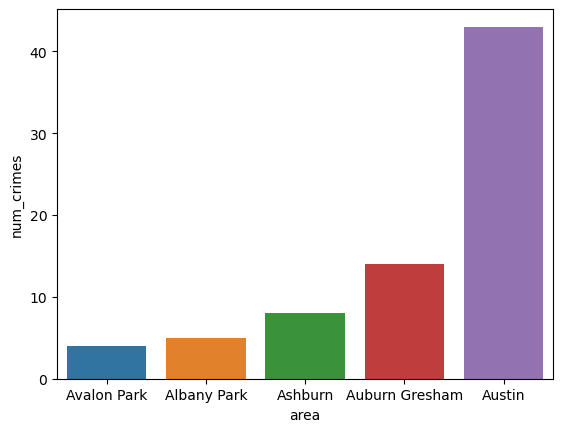

In [12]:
%matplotlib inline
import seaborn

plot = seaborn.barplot(x='area',y='num_crimes', data=df)

In [13]:
%%sql
DROP VIEW CRIMES_PER_AREA;
CREATE VIEW CRIMES_PER_AREA AS
    SELECT COMMUNITY_AREA_NAME as area, COUNT(*) AS num_crimes FROM (
    SELECT CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER, CENSUS_DATA.COMMUNITY_AREA_NAME FROM CHICAGO_CRIME_DATA
    LEFT JOIN CENSUS_DATA ON CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER=CENSUS_DATA.COMMUNITY_AREA_NUMBER
    )
WHERE COMMUNITY_AREA_NAME IS NOT NULL
GROUP BY COMMUNITY_AREA_NAME

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.
Done.


[]

In [14]:
%%sql  
DROP VIEW CRIMES_VS_INCOME;
CREATE VIEW CRIMES_VS_INCOME AS 
    SELECT CRIMES_PER_AREA.area, CRIMES_PER_AREA.num_crimes, CENSUS_DATA.PER_CAPITA_INCOME FROM CRIMES_PER_AREA
    LEFT JOIN CENSUS_DATA ON CENSUS_DATA.COMMUNITY_AREA_NAME=CRIMES_PER_AREA.area

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.
Done.


[]

In [15]:
%sql SELECT * FROM CRIMES_VS_INCOME ORDER BY num_crimes DESC

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


area,num_crimes,per_capita_income
Austin,43,15957
Humboldt park,22,13781
Englewood,21,11888
Near West Side,16,44689
North Lawndale,16,12034
Near North Side,15,88669
Auburn Gresham,14,15528
West Town,13,43198
Chicago Lawn,12,13231
West Englewood,12,11317


In [16]:
crimesVsIncome = %sql SELECT * FROM CRIMES_VS_INCOME ORDER BY num_crimes DESC
df = crimesVsIncome.DataFrame()

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


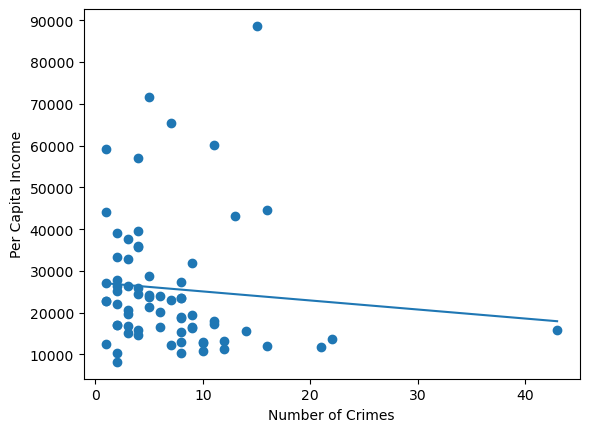

In [17]:
x=df.num_crimes
y=df.per_capita_income
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.xlabel('Number of Crimes')
plt.ylabel('Per Capita Income')

plt.plot(x, a*x+b)

plt.show()

In [18]:
%%sql  
DROP VIEW CRIMES_VS_HARDSHIP;
CREATE VIEW CRIMES_VS_HARDSHIP AS 
    SELECT CRIMES_PER_AREA.area, CRIMES_PER_AREA.num_crimes, CENSUS_DATA.HARDSHIP_INDEX FROM CRIMES_PER_AREA
    LEFT JOIN CENSUS_DATA ON CENSUS_DATA.COMMUNITY_AREA_NAME=CRIMES_PER_AREA.area

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.
Done.


[]

In [19]:
%sql SELECT * FROM CRIMES_VS_HARDSHIP ORDER BY num_crimes DESC

 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


area,num_crimes,hardship_index
Austin,43,73
Humboldt park,22,85
Englewood,21,94
Near West Side,16,15
North Lawndale,16,87
Near North Side,15,1
Auburn Gresham,14,74
West Town,13,10
Chicago Lawn,12,80
West Englewood,12,89


 * ibm_db_sa://gwt97841:***@19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:30699/BLUDB
Done.


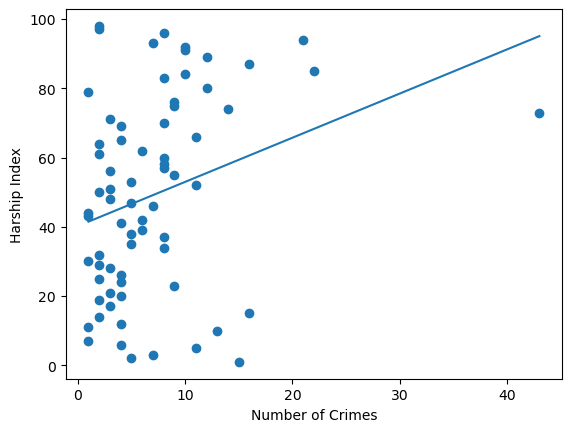

In [20]:
crimesVsHardship = %sql SELECT * FROM CRIMES_VS_HARDSHIP ORDER BY num_crimes DESC
df = crimesVsHardship.DataFrame()

x=df.num_crimes
y=df.hardship_index
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.xlabel('Number of Crimes')
plt.ylabel('Harship Index')

plt.plot(x, a*x+b)

plt.show()